# Bài tập thực hành tổng hợp

# Một số kĩ thuật cơ bản

1. Tải ảnh từ URL trên Internet
2. Hiển thị ảnh dùng matplotlib
3. Convolution
4. Làm nhoè ảnh 
5. Xác định độ nhoè của ảnh


# Tải ảnh từ URL trên Internet dùng skimage

In [1]:
#written by B2DL

# dùng skimage cho đơn giản

import cv2
from skimage import  io

url = 'https://raw.githubusercontent.com/kineticR/Image-coin-counter/master/money.jpg'
img = io.imread(url)

# lưu ý dùng cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

saveimg = 'money.jpg'
cv2.imwrite(saveimg, cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 

print('### Saving image from {} to {}'.format(url, saveimg))
# hiển thị kết quả lưu sẽ được minh hoạ ở bước tiếp theo

### Saving image from https://raw.githubusercontent.com/kineticR/Image-coin-counter/master/money.jpg to money.jpg


# Hiển thị ảnh dùng matplotlib 

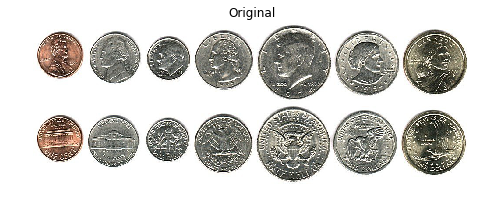

In [16]:
#written by B2DL

import cv2
import matplotlib.pyplot as plt

saveimg = 'money.jpg'
img = cv2.imread(saveimg)

# Get current size --> change the size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.axis('off')
plt.title('Original')

# lưu ý dùng cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# ngoài ra vẫn có thể dùng với cv2.imshow()

# Convolution

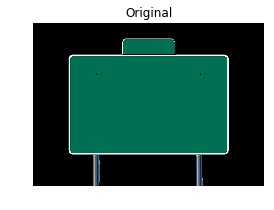

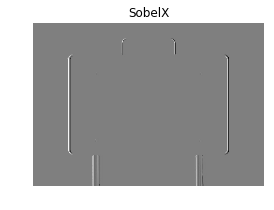

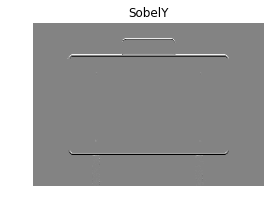

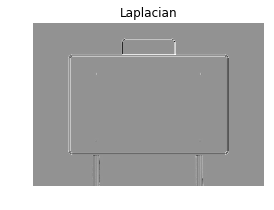

In [17]:
#written by B2DL

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import  io
import random

# đọc ảnh từ URL 
url = 'https://cdn.pixabay.com/photo/2014/09/11/04/38/shield-441403_960_720.png'

img = io.imread(url)

# lưu ảnh xuống file - theo định dạng jpg
saveimg = 'shield.jpg'
cv2.imwrite(saveimg, cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 

# đọc ảnh từ file
img = cv2.imread(saveimg)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)  # y

laplacian = cv2.Laplacian(gray,cv2.CV_64F,ksize=5)

# Get current size --> change the size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size


plt.axis('off')
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.title('SobelX')
plt.imshow(sobelx, cmap = 'gray')
plt.show()

plt.axis('off')
plt.title('SobelY')
plt.imshow(sobely, cmap = 'gray')
plt.show()


plt.axis('off')
plt.title('Laplacian')
plt.imshow(laplacian, cmap = 'gray')
plt.show()

# Làm nhoè ảnh (Blurring)

Bài thực hành sau minh hoạ cách sử dụng các hàm làm nhoè ảnh - với tham số chính là kích thước kernel.

* cv2.blur(): mean kernel - độ nhoè tuỳ kích thước của kernel

* cv2.GaussianBlur(): Gaussian kernel

* cv2.medianBlur(): minh hoạ với việc khử nhiễu

* sp_noise(): dùng để tạo nhiễm salt & pepper

*Lưu ý*: các ví dụ minh hoạ dùng thư viện matplotlib để hiển thị ảnh (thay vì dùng cv2.imshow()) - dùng thứ tự RGB, trong khi cv2 dùng thứ tự BGR nên cần lưu ý chuyển đổi qua lại để hiển thị đúng.

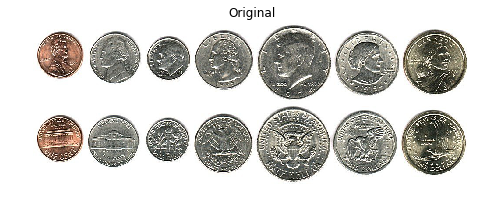

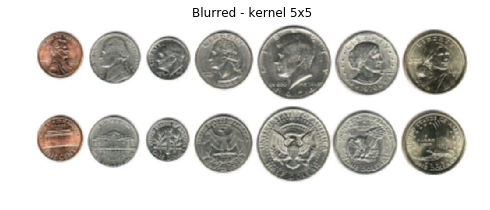

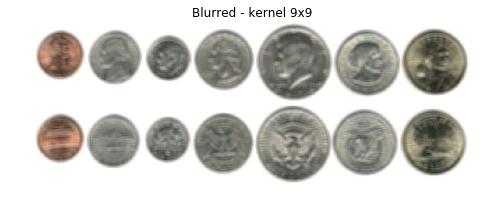

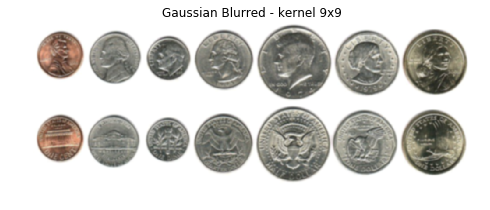

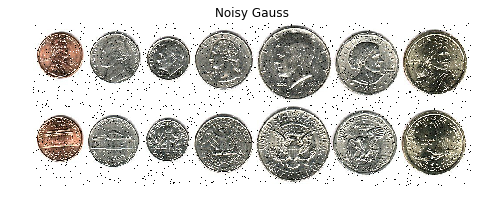

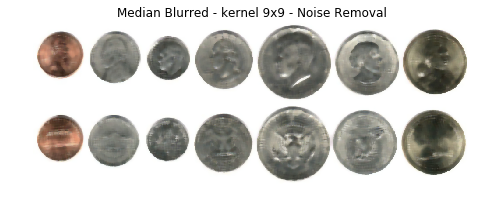

In [18]:
#written by B2DL

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import  io
import random

def sp_noise(image,prob):
# Add salt and pepper noise to image
# prob: Probability of the noise - càng lớn - càng nhiều nhiễu
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

# đọc ảnh từ URL 
url = 'https://raw.githubusercontent.com/kineticR/Image-coin-counter/master/money.jpg'
img = io.imread(url)

# lưu ảnh xuống file - theo định dạng jpg
# nhớ phải chuyển sang dạng BGR khi dùng với cv2.imwrite
saveimg = 'money.jpg'
cv2.imwrite(saveimg, cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 

# đọc ảnh từ file
img = cv2.imread(saveimg)

# kernel 5x5
blur5 = cv2.blur(img,(5,5))
blur9 = cv2.blur(img,(9,9))

# Get current size --> change the size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.axis('off')
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.title('Blurred - kernel 5x5')
plt.imshow(cv2.cvtColor(blur5, cv2.COLOR_BGR2RGB))
plt.show()

plt.axis('off')
plt.title('Blurred - kernel 9x9')
plt.imshow(cv2.cvtColor(blur9, cv2.COLOR_BGR2RGB))
plt.show()

# Gaussian blur
gblur9 = cv2.GaussianBlur(img,(9,9),0)
plt.axis('off')
plt.title('Gaussian Blurred - kernel 9x9')
plt.imshow(cv2.cvtColor(gblur9, cv2.COLOR_BGR2RGB))
plt.show()

# Add noise
noisy_img = sp_noise(img, 0.02)
plt.axis('off')
plt.title('Noisy Gauss')
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.show()

# Median blur
medblur9 = cv2.medianBlur(noisy_img, 9)
plt.axis('off')
plt.title('Median Blurred - kernel 9x9 - Noise Removal')
plt.imshow(cv2.cvtColor(medblur9, cv2.COLOR_BGR2RGB))
plt.show()


# Xác định độ nhoè của ảnh


Bài thực hành sau minh hoạ việc xác định mức độ nhoè của ảnh thông qua hàm cv2.Laplacian(image, cv2.CV_64F).var().

Giá trị trả về của hàm trên càng nhỏ - mức độ nhoè càng lớn.

Đồng thời minh hoạ thao tác sharpen thông qua việc dùng hàm convolution cv2.filter2D. Tuỳ vào kernel mà kết quả sẽ khác nhau.

Tham khảo: https://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/

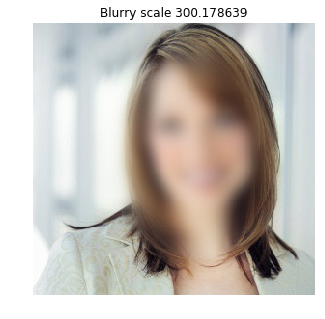

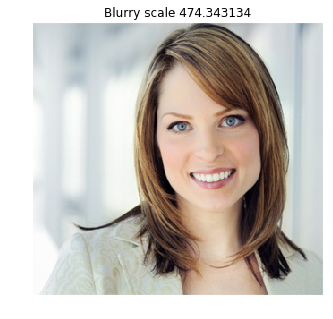

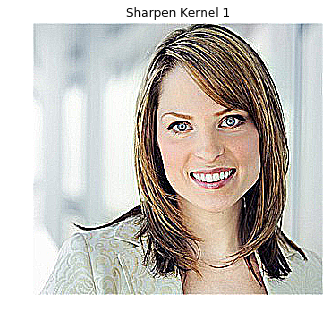

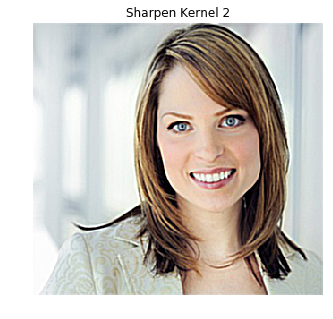

In [22]:
#written by B2DL

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import  io
import random

def showblur (url, saveimg):
    # đọc ảnh từ URL - dùng skimage (opencv không hỗ trợ)
    img = io.imread(url)

    # phải chuyển sang dạng BGR khi dùng với cv2.imwrite
    cv2.imwrite(saveimg, cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 

    # đọc ảnh từ file
    img = cv2.imread(saveimg)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(gray, cv2.CV_64F).var()
    
    # giá trị càng nhỏ --> nhiều khả năng bị nhoè
    title = 'Blurry scale %f' % fm

    plt.axis('off')
    plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

url = 'https://res.cloudinary.com/demo/image/upload/e_blur_faces/front_face.jpg'
saveimg = 'blurface.jpg'
showblur(url, saveimg)

url = 'http://oysterpointdentistry.com/images/blog/adult-woman.jpg'
saveimg = 'noblurface.jpg'
showblur(url, saveimg)

# đọc ảnh từ file
img = cv2.imread(saveimg)

kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen_img = cv2.filter2D(img, -1, kernel_sharpen_1)

# Get current size --> change the size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.axis('off')
plt.title('Sharpen Kernel 1')
plt.imshow(cv2.cvtColor(sharpen_img, cv2.COLOR_BGR2RGB))
plt.show()

kernel_sharpen_2 = np.array([[-1,-1,-1,-1,-1],
                             [-1,2,2,2,-1],
                             [-1,2,8,2,-1],
                             [-1,2,2,2,-1],
                             [-1,-1,-1,-1,-1]]) / 8.0
sharpen_img = cv2.filter2D(img, -1, kernel_sharpen_2)
plt.axis('off')
plt.title('Sharpen Kernel 2')
plt.imshow(cv2.cvtColor(sharpen_img, cv2.COLOR_BGR2RGB))
plt.show()



# Ảnh nhị phân (Thresholding), phát hiện cạnh (Edge detection), đường biên (Contours)

Bài thực hành sau minh hoạ việc tạo ảnh nhị phân thông qua hai bước: làm nhoè ảnh và dùng adaptive threshold, và phát hiện cạnh dùng phương pháp Canny. Với hai đầu vào khác nhau, kết quả của việc tìm đường biên cũng khác nhau.

Tham khảo: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html

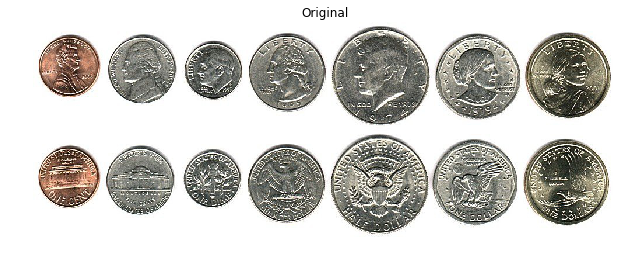

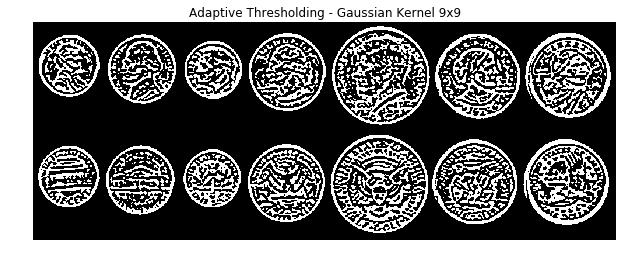

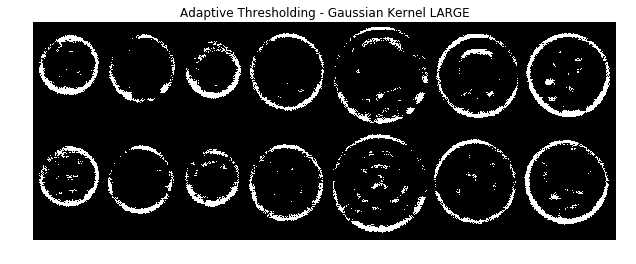

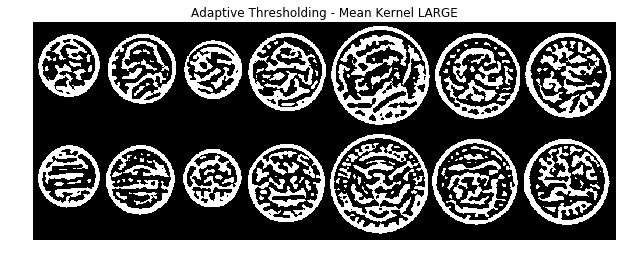

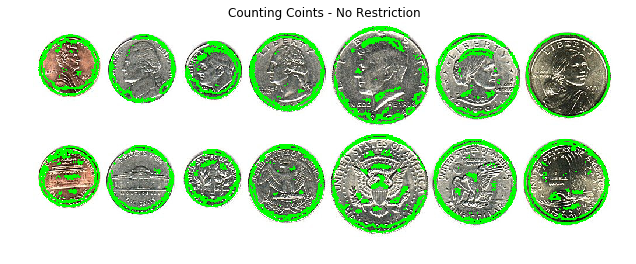

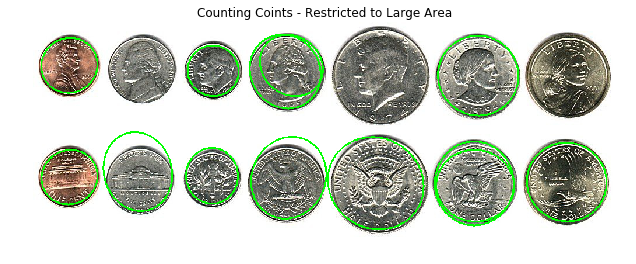

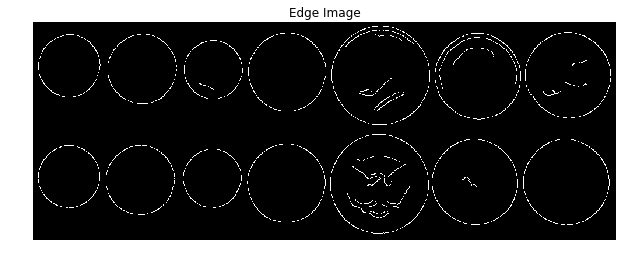

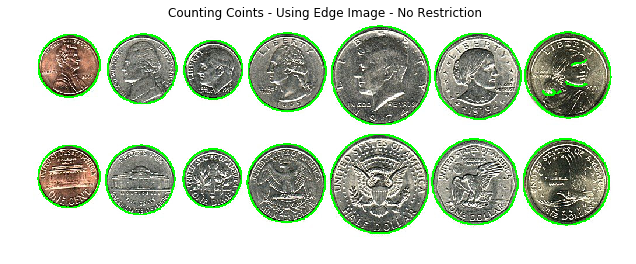

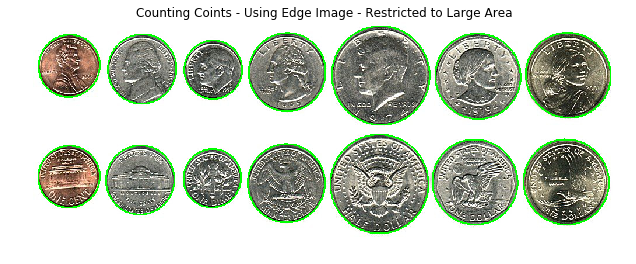

Number of coints: 14


In [23]:
#written by B2DL

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import  io
import random

# đọc ảnh từ URL
url = 'https://raw.githubusercontent.com/kineticR/Image-coin-counter/master/money.jpg'
img = io.imread(url)

# lưu ảnh xuống file - theo định dạng jpg
# nhớ phải chuyển sang dạng BGR khi dùng với cv2.imwrite
saveimg = 'money.jpg'
cv2.imwrite(saveimg, cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 

# đọc ảnh từ file
img = cv2.imread(saveimg)

# Get current size --> change the size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.axis('off') 
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# chuyển sang ảnh nhị phân dùng adaptive threshold
gblur = cv2.GaussianBlur(img,(9,9),0)
gray = cv2.cvtColor(gblur, cv2.COLOR_BGR2GRAY)

# thử với cv2.THRESH_BINARY và so sánh với cv2.THRESH_BINARY_INV
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.axis('off')
plt.title('Adaptive Thresholding - Gaussian Kernel 9x9')
plt.imshow(adaptive_thresh, cmap = plt.get_cmap('gray'))
plt.show()

# kernel size lớn để làm nhoè các chi tiết
gblur = cv2.GaussianBlur(img,(35,35),0)
gray = cv2.cvtColor(gblur, cv2.COLOR_BGR2GRAY)
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.axis('off') 
plt.title('Adaptive Thresholding - Gaussian Kernel LARGE')
plt.imshow(adaptive_thresh, cmap = plt.get_cmap('gray'))
plt.show()

# kernel size lớn để làm nhoè các chi tiết - dùng phương pháp cv2.ADAPTIVE_THRESH_MEAN_C
gblur = cv2.GaussianBlur(img,(17,17),0)
gray = cv2.cvtColor(gblur, cv2.COLOR_BGR2GRAY)
adaptive_thresh2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.axis('off') 
plt.title('Adaptive Thresholding - Mean Kernel LARGE')
plt.imshow(adaptive_thresh2, cmap = plt.get_cmap('gray'))
plt.show()

# find contour using binary image
itmp, cnts, hierarchy = cv2.findContours(adaptive_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# draw contours: -1 will draw all contours
# hạn chế là ko chặn được các contour nhỏ
img2 = img.copy();
cv2.drawContours(img2, cnts, -1, (0, 255, 0), 2)

plt.axis('off') 
plt.title('Counting Coints - No Restriction')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

# duyệt qua danh sách contour và chỉ xét các contour có vùng đủ lớn - tham số thiết lập thủ công
img2 = img.copy();
for cnt in cnts:
    area = cv2.contourArea(cnt)
    if area < 500 or area > 10000:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img2, ellipse, (0,255,0), 2)

plt.axis('off') 
plt.title('Counting Coints - Restricted to Large Area')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

# find contour using edge image
edge_img = cv2.Canny(gblur, 30, 150)

plt.axis('off') 
plt.title('Edge Image')
plt.imshow(edge_img, cmap = plt.get_cmap('gray'))
plt.show()

itmp, cnts, hierarchy = cv2.findContours(edge_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img2 = img.copy();
cv2.drawContours(img2, cnts, -1, (0, 255, 0), 2)

plt.axis('off') 
plt.title('Counting Coints - Using Edge Image - No Restriction')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

# chỉ tính các contour có vùng đủ lớn
img2 = img.copy();
num = 0;
for cnt in cnts:
    area = cv2.contourArea(cnt)
    if area < 100:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img2, ellipse, (0,255,0), 2)
    num = num+1

plt.axis('off') 
plt.title('Counting Coints - Using Edge Image - Restricted to Large Area')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

print('Number of coints: %d' % num)


# Phương pháp đơn giản dùng phát hiện biển báo giao thông

Bài thực hành sau sử dụng phương pháp dùng màu (color segmentation) để phát hiện biển báo giao thông loại có màu đỏ (ví dụ biển báo giới hạn tốc độ). 

Phương pháp này không tổng quát và không có độ chính xác cao bởi vì phải biết trước màu của biển báo và phải đặt các tham số một cách thủ công. 

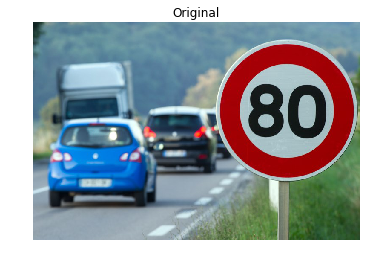

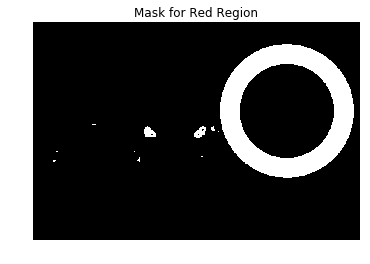

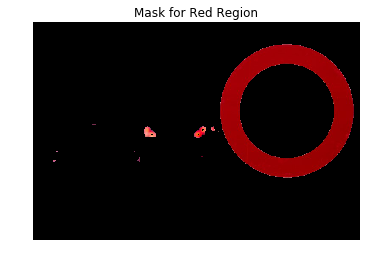

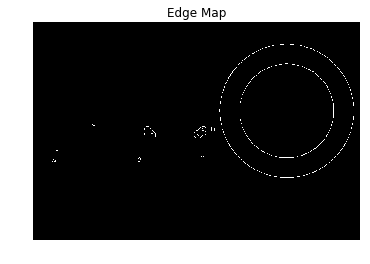

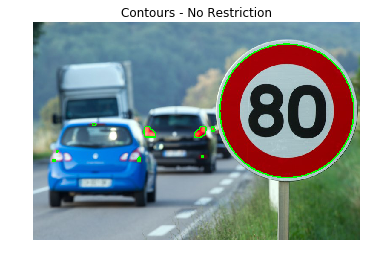

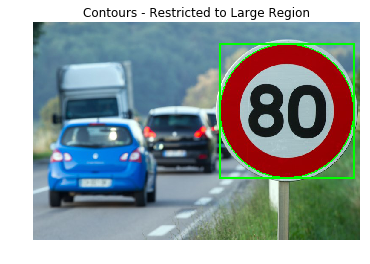

In [24]:
#written by B2DL

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import  io
import random

# read an image from URL
def imreadx(url, img_name):
    img = io.imread(url)
    outimg = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(img_name, outimg) 
    
    return outimg

def imshowx(img, title='B2DL'):
    # Get current size --> change the size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size
    
    plt.axis('off') 
    plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

def imshowgrayx(img, title='B2DL'):
    plt.axis('off') 
    plt.title(title)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.show()

# danh sách các ảnh để thử 
url = 'https://i.stack.imgur.com/hmxxi.jpg'
tds_img = 'tds-1.jpg'

url = 'https://baomoi-photo-1-td.zadn.vn/w700_r1m/17/05/21/70/22330797/1_199003.jpg'
tds_img = 'tds-3.jpg'

url = 'https://cdn.tuoitre.vn/zoom/600_375/tto/i/s626/2016/03/01/fd8a4f18.jpg'
tds_img = 'tds-4.jpg'

url = 'https://www.thelocal.fr/userdata/images/article/5d9b18a1fa6ccc206d22580d1816b87a7112c6079841eb58441f1e79c771fd05.jpg'
tds_img = 'tds-2.jpg'

img = imreadx(url, tds_img)
imshowx(img, 'Original')

# convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# mask of red - dùng để cô lập các pixel có màu đỏ Red trong không gian màu HSV 
mask_r1 = cv2.inRange(hsv, (0, 100, 100), (10, 255, 255))
#imshowgrayx(mask_r1, 'Mask Range 1')

mask_r2 = cv2.inRange(hsv, (160, 100, 100), (180, 255, 255))
#imshowgrayx(mask_r2, 'Mask Range 1')

# điều kiện HOẶC
mask_r = cv2.bitwise_or(mask_r1, mask_r2)
imshowgrayx(mask_r, 'Mask for Red Region')

# hiển thị kết quả trên ảnh gốc
target = cv2.bitwise_and(img, img, mask=mask_r)
imshowx(target, 'Mask for Red Region')

# dùng để tính cạnh - lưu ý các tham số được đặt thủ công - thay đổi để xem kết quả thế nào?!
gblur = cv2.GaussianBlur(mask_r, (9,9),0)

edge_img = cv2.Canny(gblur, 30, 150)
imshowgrayx(edge_img, 'Edge Map')

img2 = img.copy();

# hãy thử với cv2.RETR_TREE và so sánh kết quả với cv2.RETR_EXTERNAL
itmp, cnts, hierarchy = cv2.findContours(edge_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img2, cnts, -1, (0, 255, 0), 2)
imshowx(img2, 'Contours - No Restriction')

# chỉ tính các contour có vùng đủ lớn
img2 = img.copy();
for cnt in cnts:
    area = cv2.contourArea(cnt)
    if area < 1000:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img2, ellipse, (0,255,0), 2)
    
    # find bounding box
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),3)

imshowx(img2, 'Contours - Restricted to Large Region')

